# Hyperbolic Plance

### Reflection
A **reflection** in a euclidean space $V$ endowed with a positive definite symetric bilinear form $(\alpha,\lambda)$. A reflection is a linear operator $s$ on $V$ sending some nonzero vector $\alpha$ to its negative while fixing pointwise the hyperplance $H_\alpha$ orthogonal to $\alpha$. We may write $s=s_\alpha$, bearing in mind that $s_\alpha=s_{c\alpha}$ for any $c\in\mathbb R$. Such reflection has the following simple formula:

$$s_\alpha\lambda=\lambda-\frac{2(\lambda,\alpha)}{(\alpha,\alpha)}\alpha$$

Indeed, this is correct when $\lambda=\alpha$ and when $\lambda\in H_\alpha$; so it is correct for $\lambda\in V=\mathbb R\alpha\oplus H_\alpha$. A quick calculation shows that $s_\alpha$ is an orthogonal transform as $(s_\alpha\lambda,s_\alpha\mu)=(\lambda,\mu)$ for all $\lambda,\mu\in V$. It is clear that $s_\alpha^2=1$, so $s_\alpha$ has order $2$ in the group $O(V)$ of all orthogonal transforms of $V$.

A finite group generated by reflections (or **finite reflection group**, for short) is an epecially interesting type of finite subgroup of $O(V)$.

In [71]:
import Diagrams.Prelude
import IHaskell.Display.Graphviz hiding (dot)

In [72]:
reflection:: (Metric v, Fractional a)=>v a->v a->v a
reflection a b = b ^-^ (c*^a) where c= (2.0*dot a b)/dot a a

In [73]:
:set -XTypeFamilies

polyRegularD n d = polygon(with & polyType .~ PolyRegular n d)

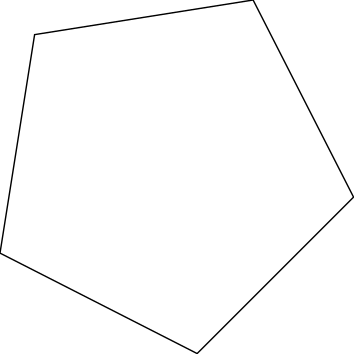

In [74]:
diagram $ polyRegularD 5 1 # rotate (45 @@ deg) # translateX 5

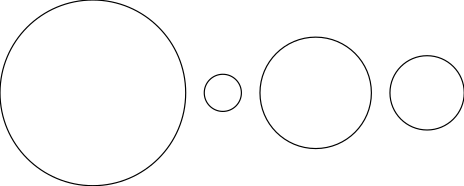

In [75]:
diagram $ hsep 1 $ map circle [5,1,3,2]

In [76]:
illustrateBézier c1 c2 x2
    =  endpt
    <> endpt  # translate x2
    <> ctrlpt # translate c1
    <> ctrlpt # translate c2
    <> l1
    <> l2
    <> fromSegments [bézier3 c1 c2 x2]
  where
    dashed  = dashingN [0.03,0.03] 0
    endpt   = circle 0.05 # fc red  # lw none
    ctrlpt  = circle 0.05 # fc blue # lw none
    l1      = fromOffsets [c1] # dashed
    l2      = fromOffsets [x2 ^-^ c2] # translate c2 # dashed

x2      = r2 (3,-1) :: V2 Double    -- endpoint
[c1,c2] = map r2 [(1,2), (3,0)]     -- control points

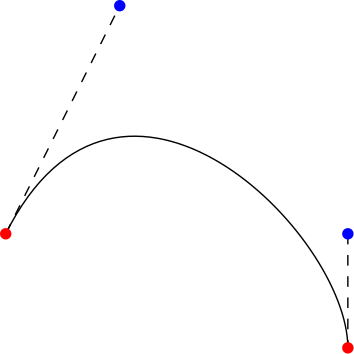

In [77]:
diagram $ illustrateBézier c1 c2 x2

Line 20: Redundant bracket
Found:
(sqrt 2) ^& (sqrt 2)
Why not:
sqrt 2 ^& (sqrt 2)Line 20: Redundant bracket
Found:
(sqrt 2) ^& (sqrt 2)
Why not:
(sqrt 2) ^& sqrt 2

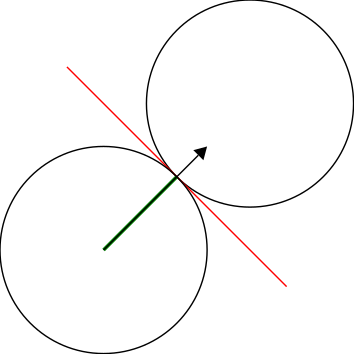

In [88]:
mkEnvelope v d
  = mconcat
    [arrowAt' (with & arrowHead .~ tri) origin v
    , origin ~~ b
      # lc green # lw veryThick
    , p1 ~~ p2
      # lc red
    ]
    where
      b  = envelopeP v d
      v' = 1.5 *^ signorm v
      p1 = b .+^ rotateBy (1/4) v'
      p2 = b .+^ rotateBy (-1/4) v'

d1 :: Path V2 Double
d1 = circle 1

d2 = d1 # translate (1 ^& 1)

diagram $ circle 1 <> mkEnvelope (r2 (1,1)) d1 <> (circle 1 # translate ((sqrt 2) ^& (sqrt 2)))

In [96]:
p=envelopeP (r2 (1,1)) d1

In [113]:
a = r2 $ unp2 p

In [115]:
b = r2 (0,0)

In [116]:
reflection a b

V2 0.0 0.0